## Script For Downloading Stock quotes 


Records Processed 3752
---Execution Completed in 3.594113349914551 seconds ---


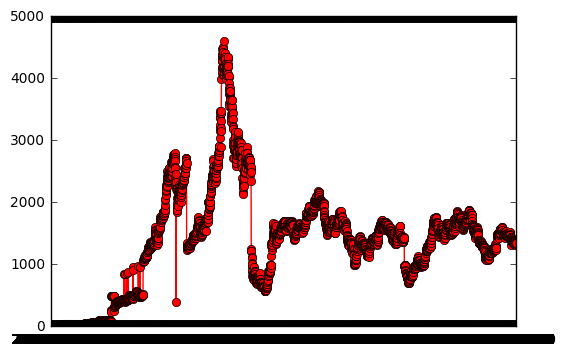

In [27]:
import matplotlib.pyplot as plt
from urllib import request
import datetime as DT
from matplotlib.dates import date2num
import time
start_time = time.time()
%matplotlib inline  


url = "http://real-chart.finance.yahoo.com/table.csv?s=LT.NS&a=06&b=1&c=2002&d=11&e=30&f=2016&g=d&ignore=.csv"


def download(url1):
    response = request.urlopen(url1)
    data = response.read()
    data_str = str(data)
    lines = data_str.split("\\n")
    lines = lines[1:-2]
    file = r"TCS.csv"
    fx = open(file,'w')
    n = 0
    datee = []
    index = []
    data = []
    for line in lines:
       # print(line)
        ftr = line[0:10]
        #print(ftr, "before")
        #ftr.replace("-0", "-1")
       # print(ftr, "after")
        datee.append(line[0:10])
       # print(datee,"here")
        index.append(line[11:16])
        fx.write(line + "\n")
        n += 1
       # data = [(DT.datetime.strptime(*(ftr, "%Y-%m-%d")[0:100]), index)]
        

    datee = datee[::-1]
    index = index[::-1]
    for x,y in zip(datee,index):
        timess = DT.datetime.strptime(x, "%Y-%m-%d")
        data.append([timess, y])
         #print(x,y)
       #  print(data)
    print('Records Processed',n)
    print("---Execution Completed in %s seconds ---" % (time.time() - start_time))


    x = [date for (date, value) in data]
    y = [value for (date, value) in data]

    fig = plt.figure()

    graph = fig.add_subplot(111)

    # Plot the data as a red line with round markers
    graph.plot(x,y,'r-o')

    # Set the xtick locations to correspond to just the dates you entered.
    graph.set_xticks(x)

    # Set the xtick labels to correspond to just the dates you entered.
    graph.set_xticklabels(
            [date.strftime("%Y-%m-%d") for (date, value) in data]
            )

    plt.show()

download(url)
